# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [27]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [28]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

[179098.59189784]
[-17759.04832737]
[-40647.21475514]


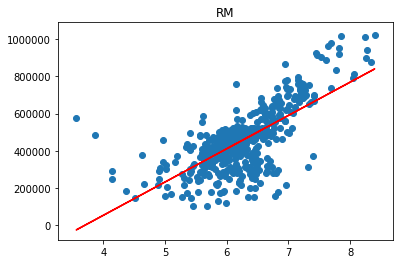

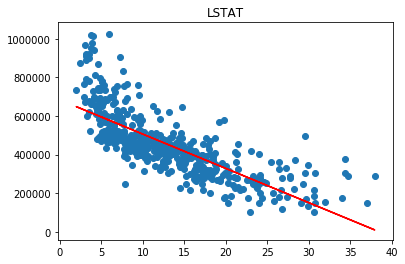

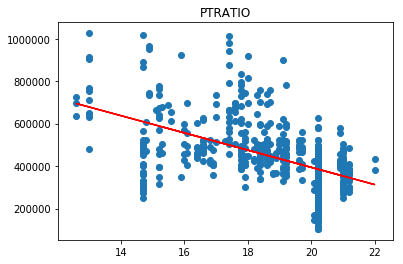

In [29]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
target = prices    
### Linear Regression from Scikit-Learn
model = LinearRegression()
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values.reshape(-1, 1)
    model.fit(x, prices)
    print(model.coef_)
### Data visualization using matplotlib e numpy    
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values
    fig, ax = plt.subplots()
    fit = np.polyfit(x, target , deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    plt.title(variable)
    ax.scatter(x, target )
fig.show()

**Answer:**
* RM - Positive correlation: an increase in RM would generally lead to and increase in MEDV.  I would expect a higher number of rooms to correlate to a more expensive home and vice versa. Having more rooms and more space are often desirable in a house.
* LSTAT - Negative correlation: an increase in LSTAT would generally lead to a decrease in MEDV. I would expect that when LSTAT is higher, the house would be less expensive. Home values tend to increase in areas where people make more money and have more money to spend.
* PTRATIO - Negative correlation: an increase in PTRATIO would generally lead to a decrease in MEDV. A lower ratio of students to teachers could mean that a teacher would have more time to spend with each student, which could correlate to more expensive homes in that neighborhood. A higher ratio of students to teachers suggests that the school does not have money to spend on teachers, which often means that there isn't enough money to spend on classrooms and extracurriculars. Families usually desire homes in neighborhoods with good schools and will spend more money on homes in areas where the schools have more teachers and funding.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [30]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [31]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**
As it says above, "The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable." This suggests that, with an R2 score of 92.3%, this model has fairly successfully captured the variation of the target variable. I would say that this score suggests that the dependent variable can be predicted with a high degree of accuracy from the independent variable. 

There can be problems associated with R2 , but they can often be solved by using **adjusted R2** which is a modified version of R-squared that has been adjusted for the number of predictors in the model and may provide an unbiased estimate of the population of R2, or **predicted R2** which can prevent you from overfitting a model.

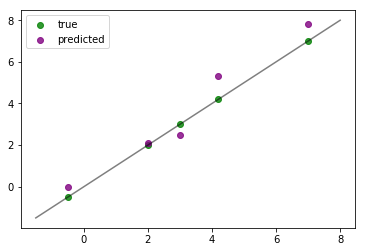

In [32]:
# Plot true values
true= [3, -0.5, 2, 7, 4.2]
true_handle = plt.scatter(true, true, alpha=0.8, color='green', label='true')

# Plot predicted values
pred = [2.5, 0, 2.1, 7.8, 5.3]
pred_handle = plt.scatter(true, pred, alpha=0.8, color='purple', label='predicted')

# Reference line
fit = np.poly1d(np.polyfit(true, true, 1))
lims = np.linspace(min(true) - 1, max(true) + 1)
plt.plot(lims, fit(lims), alpha=0.5, color='black')

# Legend and show
plt.legend(handles=[true_handle, pred_handle], loc='upper left')
plt.show()

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [33]:
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=7, test_size=0.2)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **
* The biggest benefit to splitting the data is validation, or being able to validate/measure the accuracy of training. By splitting our dataset into training and testing subsets, we have a far superior way to judge whether or not our model is over- or underfitting. Because our model doesn't see the testing data during the training phase, we don't run the risk of our model "memorizing" the correct answers before the test and overfitting to the dataset. Splitting the data optimizes the model and reduces the chance of high bias.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

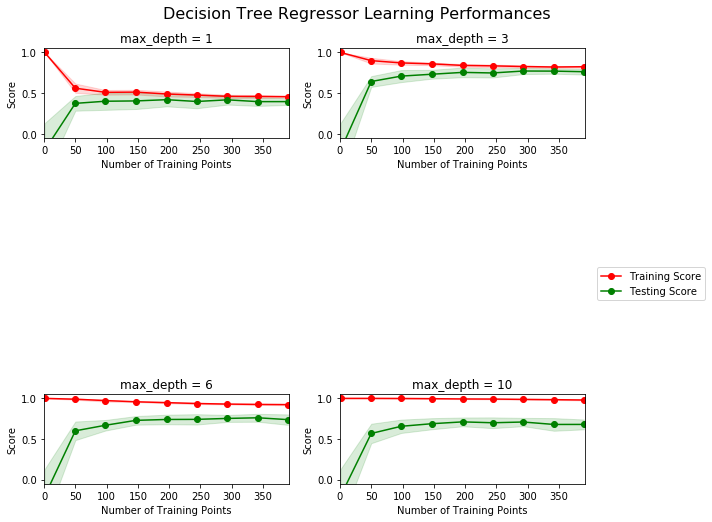

In [34]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **
* Choosing the graph with the max_depth of 3, I can see that the more data is fed into the model, the more the training and testing sets are beginning to converge. Having slightly more data might help the training and testing sets to converge even more, but once the two have converged, more data does not help significantly. It's a question of balancing accuracy and cost. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

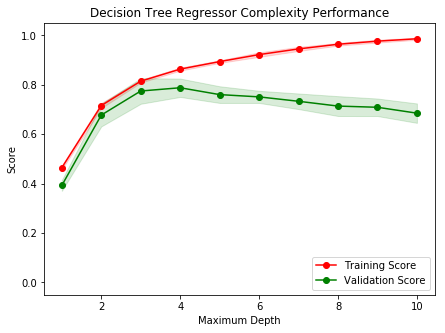

In [35]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **
* With a maximum depth of 1, the model suffers from high bias (underfitting). Bias is error from erroneous assumptions in the learning algorithm which can cause an algorithm to miss the important relationships between features and outputs. While the scores do nearly converge, both the training and validation scores are low and far from acceptable.
* When it's trained with a maximum depth of 10, it suffers from high variance (overfitting). Variance is an error due to sensitivity to fluctuations in the training set which can cause an algorithm to model the random noise in the training data. The training score is 1.0, but there is a large gap between that and the validation score, which is only about 0.7.

The tradeoff between bias and variance means essentially that a learning algorithm with low bias must be flexible so that it can fit the data well. But if the learning algorithm is too flexible (for instance, too linear), it will fit each training data set differently, and hence have high variance. One way to resolve the bias-variance dilemma, which tries to minimize the two sources of error (bias and variance), is to is to use mixture models and ensemble learning/Bayesian methods.

To build a good predictive model, you'll need to find a balance between bias and variance that minimizes the total error.

Total Error = Bias^2 + Variance + Irreducible Error

A machine learning process to find that optimal balance would include separate training and test sets, trying appropriate algorithms, fitting model parameters, tuning the right hyperparameters, appropriate performance metrics, and systematic cross-validation.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **
* A maximum depth of about 4 best generalizes to unseen data. I would have to say we get our best validation score without overcomplication at about 4, before the two sets start to seriously diverge and while the validation score is at its highest. It does not get better with increased depth from that point; the validation score begins to decrease and the model suffers from increased variance.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

The grid search technique automates the process of fine-tuning the parameters of a model in order to get the best performance. Without GridSearchCV, you would have to loop over the parameters and then all the combinations of parameters. The official documentation writes that GridSearchCV is an "exhaustive search over specified parameter values for an estimator." It considers all possible parameter combinations. It implements a "fit" and "score" method and works to tune the hyperparameters of an estimator. A hyperparameter is a parameter that isn't directly learned within the estimator, for example `C` `kernel` and `gamma` for SVC. For each parameter, it selects a small set of hyperparameters to explore. It then trains a model and finds the best parameter values to use through repeated testing. When you have a model with a number of parameters, each with its own range of possible values, a grid search would be the most effective way to fine tune the parameters for the best performance. The grid search in GridSearchCV creates combinations from a specified grid of parameter values. For example:
```
param_grid = [
  {'C': [2, 20, 200], 'kernel': ['linear']},
  {'C': [2, 20, 200], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
 ```
 specifies that two grids should be explored, one with a linear kernel and C values [2, 20, 200] and the second one with an RBF kernel and the cross product of C values [2, 20, 200] and gamma values [0.001, 0.0001]. A search consists of an estimator, a parameter space, a method for sampling candidates, a cross validation scheme, and a score function. You can specify multiple metrics for the scoring function by setting the refit parameter.
 
(This answer draws heavily on the documentation found here: https://scikit-learn.org/stable/modules/grid_search.html)

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

K-fold cross-validation is an validation technique that evaluates whether or not an algorithm will train properly. The process has a single parameter (k) that refers to the number of groups that a data set will be split into. It uses a limited sample in order to estimate how the model will perform on data that was not used in the training sample. It generally results in a less biased estimate of the skill of the model than other methods, like train-test split in which a fixed dataset may result in a bias towards only that particularily arranged dataset.   

K-fold CV works by first randomly shuffling the dataset and then it splitting it into k groups. For each new group, it takes one group as a test data set and uses the remaining groups as training sets. It fits a model on the training sets and evaluates it on the test set. It then retains the evaluation score and discards the model. Finally, it summarizes the skill of the model by using the sample of model evaluation scores. Each observation in the data sample is assigned to an individual group and stays in that group for the duration of the process, meaning each sample is used in the hold out test data set one time and used to train the model k-1 times. The results of this process are usually summarized by the mean of the model skill scores.  

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [36]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [37]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **
* The optimal model has a max depth of 4. This is the same as my guess for question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [38]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $407,232.00
Predicted selling price for Client 2's home: $229,200.00
Predicted selling price for Client 3's home: $979,300.00


In [39]:
print(features.describe())
print("\n")
print(prices.describe())

               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000


count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64


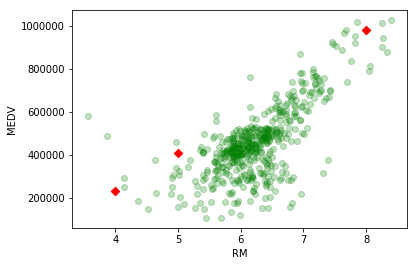

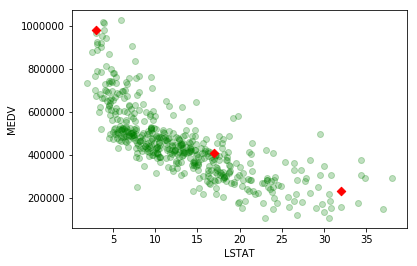

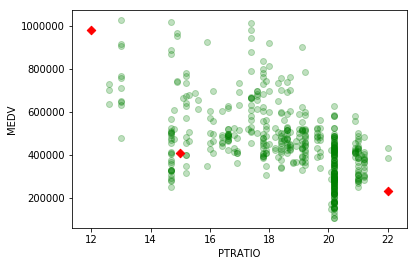

In [41]:
prediction_data = np.transpose(client_data)
pred = reg.predict(client_data)
for i, f in enumerate(features):
    plt.scatter(features[f], prices,alpha=0.25, c='green')
    plt.scatter(prediction_data[i], pred, color='red', marker='D')
    plt.xlabel(f)
    plt.ylabel('MEDV')
    plt.show()

**Answer:**
* Client 1: At 407k, this client's selling price is within one standard deviation of the mean. With five rooms, a higher than average neighborhood poverty level and a lower than average student/teacher ratio, I think that this client should sell.
* Client 2: With a house that has barely more than the minimum number of rooms, a high neighborhood poverty level, and the highest student/teacher ratio, I think that this client should sell. 229k is well above the minimum price and seems a fair selling price.
* Client 3: This client has a house with nearly the maximum number of rooms in a neighborhood with a very low poverty level and a student/teacher ratio that is just over the minimum. With a predicted selling price that is less than one standard deviation from the maximum, I think the client should sell.

(In decision tree models, feature values are preferred to be categorical. If the features are continuous, then they are discretized prior to building the model. When working with continuous variables, a decision tree will lose information when it categorizes different variables. Regression trees are used when the dependent variable is continuous and classification trees are used when the dependent variable is categorical. In case of a regression tree, the value obtained by terminal nodes in the training data is the mean response of input in that region. That means that if an unseen observation falls in that region, its prediction is made with mean value. In case of a classification tree, the value (or class) obtained by terminal node in the training data is the mode of observations falling in that region. That means that if an unseen observation falls in that region, its prediction is made with the mode value. A decision tree model works well when there is a high non-linearity and complex relationship between dependent and independent variables.)

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [25]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

I don't think that the constructed model should be used in a real-world setting. While it could be useful in a general sense, with incomplete features, parameters that cannot be adjusted easily to multiple settings, and the simple fact that these few parameters are simply not comprehensive enough to judge the price of an individual home, it does not make sense to use this model to predict the actual predicted selling prices of homes.


* Relevancy: This data is not very relevant today. Even adjusting for inflation, housing prices and pricing considerations have changed wildly since the 1970s. 
* Features: Although the features covered are features that are important to housing prices today, there are a number of other features that should factor in, including things like proximity to a large city and public transportation.
* Robusticity: This model appears to be not well generalized and not terribly robust. Running it multiple times provides a large variance in pricing, which would most likely be unsatisfactory in a real-world setting.
* The data collected in an urban city could be applicable in a rural city, but would have to be approached in a different way. It would be possible to apply formulas to standardize the data, but values like student/teacher ratio and percent of lower-class workers couldn't be directly compared.
* Fairness: Certainly the characteristics of an entire neighborhood could factor into the value of a home, but it doesn't make sense to judge the price of an individual home based solely on the characteristics of the neighborhood. The house could be exceptionally well cared-for and upgraded, or it could be completely run-down. A house in one part of the neighborhood could be substantially different than a similar one in another corner. While you can get a sense of the price of an individual home based on the characteristics of the neighborhood, those characteristics shouldn't be the sole consideration.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

**Sources include:**
* https://machinelearningmastery.com/k-fold-cross-validation/
* http://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables
* https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
* https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/
* https://scikit-learn.org/stable/modules/grid_search.html